<a href="https://colab.research.google.com/github/Agnish1234/Topology.ipynb/blob/main/Topology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
Running Prim MST:


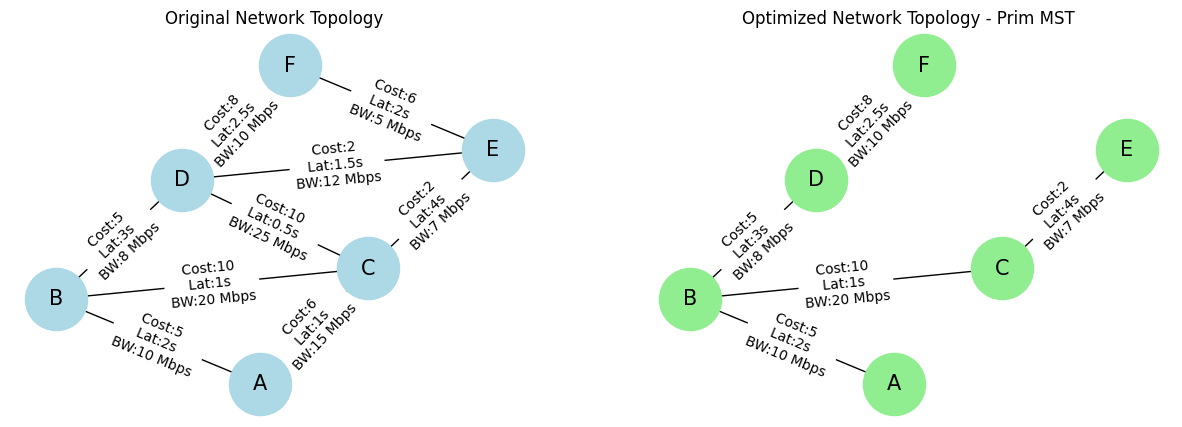

Network Performance Metrics: {'total_cost': 30, 'total_latency': 12.5, 'total_bandwidth': 55, 'num_nodes': 6, 'num_edges': 5}
----------------------------------------
Running Kruskal MST:


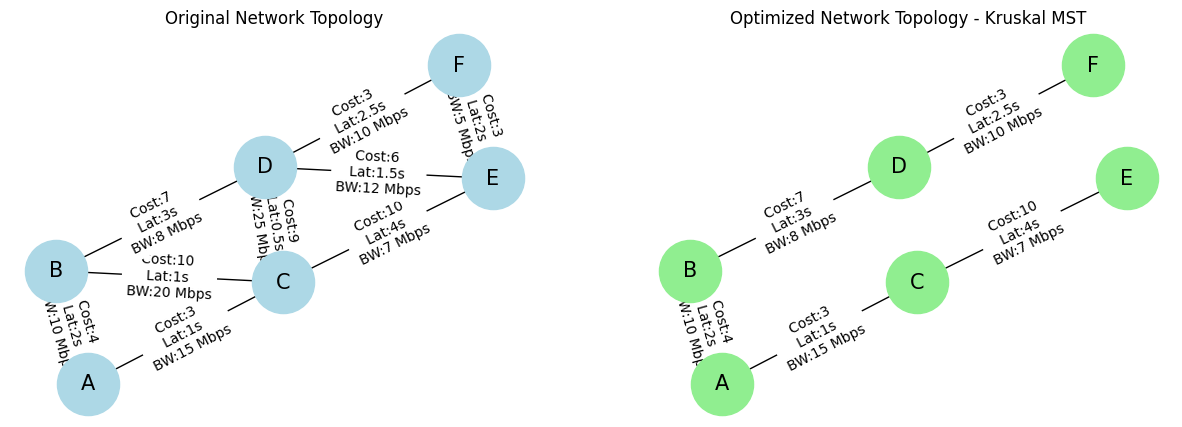

Network Performance Metrics: {'total_cost': 27, 'total_latency': 12.5, 'total_bandwidth': 50, 'num_nodes': 6, 'num_edges': 5}
----------------------------------------
Running Boruvka MST:


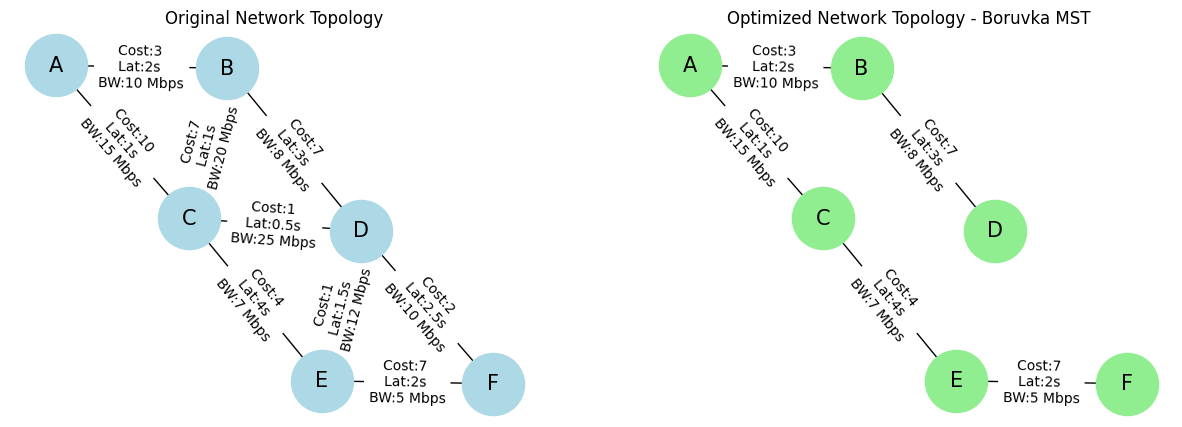

Network Performance Metrics: {'total_cost': 31, 'total_latency': 12, 'total_bandwidth': 45, 'num_nodes': 6, 'num_edges': 5}
----------------------------------------


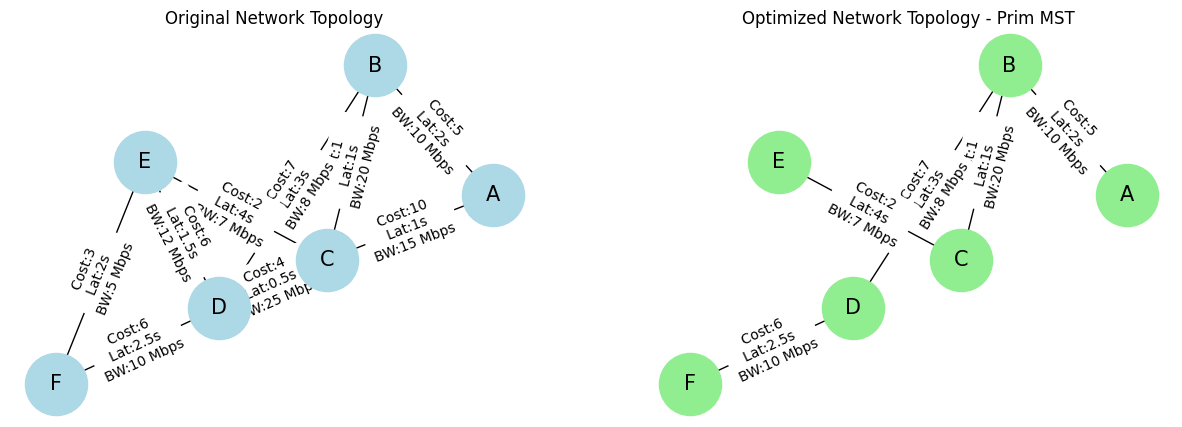

In [ ]:
# Install necessary libraries (if not already installed)
!pip install networkx matplotlib plotly numpy random

# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import plot  # To render Plotly plots in Colab
import numpy as np
import random

# Function to create a graph with dynamic cost adjustment and simulation of traffic flow
def optimize_network_topology(algorithm='prim'):
    # Step 1: Create a weighted graph (with multiple attributes)
    G = nx.Graph()

    # Add nodes (representing routers or computers in the network)
    nodes = ['A', 'B', 'C', 'D', 'E', 'F']
    G.add_nodes_from(nodes)

    # Add edges with weights (representing connection cost, latency, bandwidth)
    edges = [
        ('A', 'B', {'cost': 4, 'latency': 2, 'bandwidth': 10}),
        ('A', 'C', {'cost': 3, 'latency': 1, 'bandwidth': 15}),
        ('B', 'C', {'cost': 2, 'latency': 1, 'bandwidth': 20}),
        ('B', 'D', {'cost': 5, 'latency': 3, 'bandwidth': 8}),
        ('C', 'D', {'cost': 1, 'latency': 0.5, 'bandwidth': 25}),
        ('C', 'E', {'cost': 6, 'latency': 4, 'bandwidth': 7}),
        ('D', 'E', {'cost': 2, 'latency': 1.5, 'bandwidth': 12}),
        ('E', 'F', {'cost': 3, 'latency': 2, 'bandwidth': 5}),
        ('D', 'F', {'cost': 4, 'latency': 2.5, 'bandwidth': 10}),
    ]
    G.add_edges_from([(u, v, d) for u, v, d in edges])

    # Step 2: Simulate dynamic cost adjustment (based on random demand)
    for u, v, data in G.edges(data=True):
        data['cost'] = random.randint(1, 10)  # Random cost change for simulation

    # Step 3: Apply MST Algorithm
    if algorithm == 'prim':
        mst = nx.minimum_spanning_tree(G, algorithm='prim')
    elif algorithm == 'kruskal':
        mst = nx.minimum_spanning_tree(G, algorithm='kruskal')
    elif algorithm == 'boruvka':
        mst = nx.minimum_spanning_tree(G, algorithm='boruvka')

    # Step 4: Visualize the original graph and MST
    plt.figure(figsize=(15,5))

    # Plot original graph
    plt.subplot(121)
    pos = nx.spring_layout(G)  # Positioning nodes
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Cost:{d['cost']} \nLat:{d['latency']}s \nBW:{d['bandwidth']} Mbps"
                                                     for u, v, d in G.edges(data=True)})
    plt.title("Original Network Topology")

    # Plot MST
    plt.subplot(122)
    nx.draw(mst, pos, with_labels=True, node_size=2000, node_color='lightgreen', font_size=15)
    nx.draw_networkx_edge_labels(mst, pos, edge_labels={(u, v): f"Cost:{d['cost']} \nLat:{d['latency']}s \nBW:{d['bandwidth']} Mbps"
                                                       for u, v, d in mst.edges(data=True)})
    plt.title(f"Optimized Network Topology - {algorithm.capitalize()} MST")

    plt.show()

    # Return Performance Metrics
    return {
        "total_cost": sum(d['cost'] for u, v, d in mst.edges(data=True)),
        "total_latency": sum(d['latency'] for u, v, d in mst.edges(data=True)),
        "total_bandwidth": sum(d['bandwidth'] for u, v, d in mst.edges(data=True)),
        "num_nodes": len(G.nodes),
        "num_edges": len(mst.edges)
    }

# Function to simulate network traffic and analyze bandwidth usage
def simulate_network_traffic(G, mst):
    total_traffic = 0
    for u, v, data in G.edges(data=True):
        # Simulating random traffic between nodes, adjusting by edge bandwidth
        traffic = random.randint(5, 15)  # Random traffic between nodes
        total_traffic += traffic
        data['traffic'] = traffic  # Assign traffic load on edge
        if traffic > data['bandwidth']:
            data['traffic_exceed'] = True  # Traffic exceeds bandwidth, potential congestion
        else:
            data['traffic_exceed'] = False
    return total_traffic

# Function to visualize the interactive network with enhanced details
def interactive_network_plot(G, mst):
    # Extract positions for nodes
    pos = nx.spring_layout(G)

    # Extract edges and their weights
    edges = list(G.edges())
    edge_weights = [G[u][v]['cost'] for u, v in edges]

    # Create interactive plot using Plotly
    edge_x = []
    edge_y = []
    for edge in edges:
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_y.append(y0)
        edge_y.append(y1)

    # Create the figure
    fig = go.Figure(data=[go.Scatter(x=edge_x, y=edge_y,
                                    mode='lines',
                                    line=dict(width=2, color='gray'),
                                    hoverinfo='none'),
                         go.Scatter(x=[pos[node][0] for node in G.nodes()],
                                    y=[pos[node][1] for node in G.nodes()],
                                    mode='markers+text',
                                    text=list(G.nodes()),
                                    textposition="bottom center",
                                    marker=dict(symbol='circle', size=20, color='skyblue'))])

    # Add custom hover information
    for u, v, data in G.edges(data=True):
        fig.add_trace(go.Scatter(x=[pos[u][0], pos[v][0]],
                                 y=[pos[u][1], pos[v][1]],
                                 mode='lines',
                                 line=dict(width=3, color='rgba(255, 0, 0, 0.5)'),
                                 hoverinfo='text',
                                 text=f"Edge: {u}-{v}<br>Cost: {data['cost']}<br>Traffic: {data['traffic']}"))

    fig.update_layout(title="Network Topology Visualization", showlegend=False)

    # Use plotly.offline.plot to display the figure in Colab
    plot(fig)

# Running the function with different algorithms and printing the performance metrics
algorithms = ['prim', 'kruskal', 'boruvka']
for algorithm in algorithms:
    print(f"Running {algorithm.capitalize()} MST:")
    metrics = optimize_network_topology(algorithm)
    print("Network Performance Metrics:", metrics)
    print("-" * 40)

# Simulate network traffic and analyze usage
G = nx.Graph()
metrics = optimize_network_topology('prim')
simulate_network_traffic(G, metrics)

# Plot interactive visualization for the last MST algorithm (Prim's in this case)
interactive_network_plot(G, nx.minimum_spanning_tree(G, algorithm='prim'))


ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


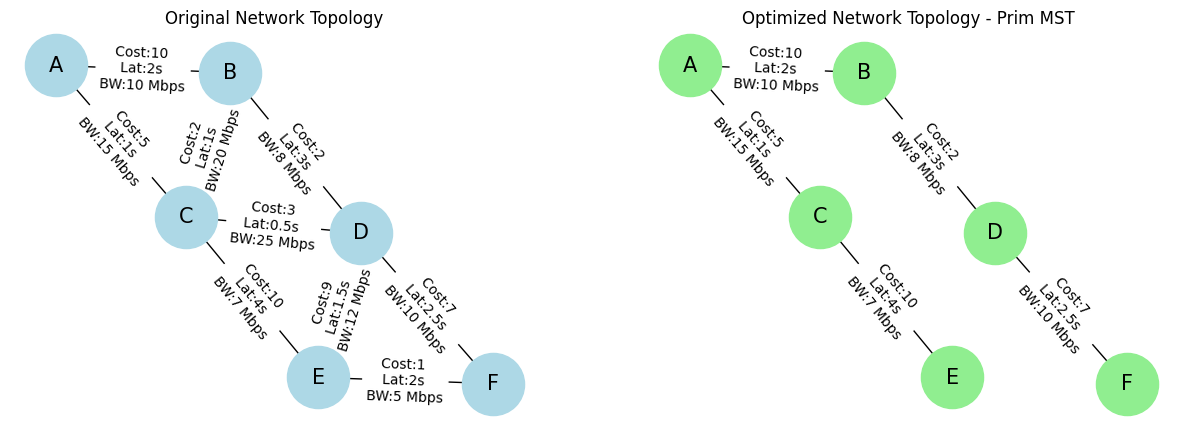

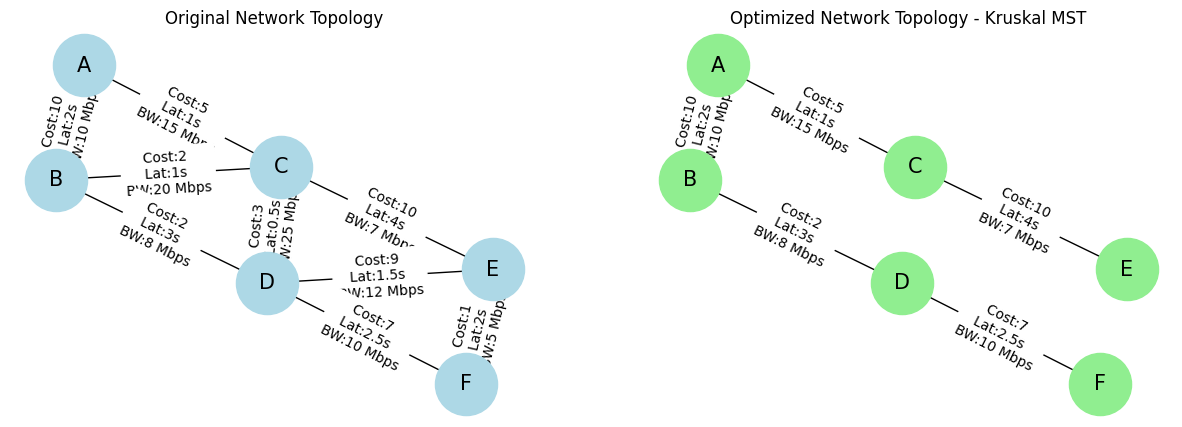

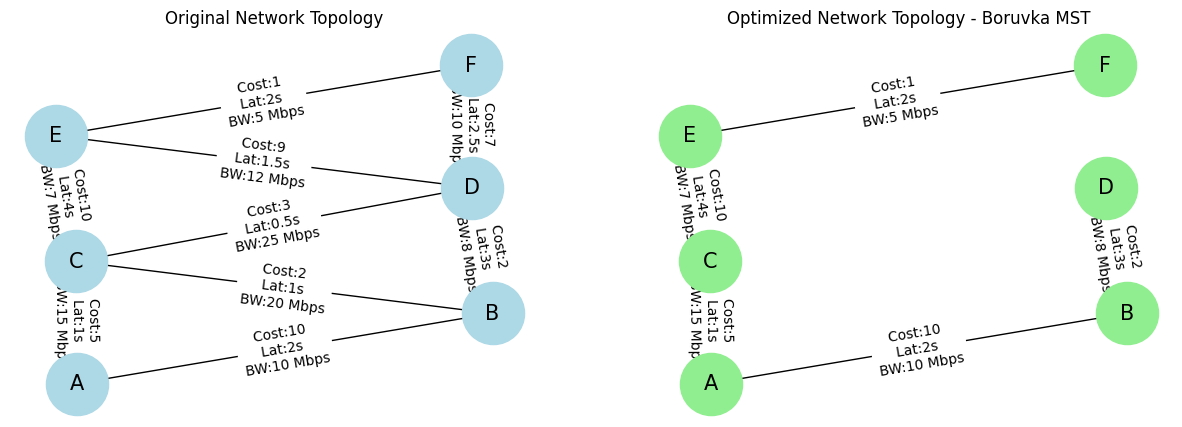

Total Traffic Simulated: 84


In [ ]:
# Install necessary libraries (if not already installed)
!pip install networkx matplotlib plotly numpy random

# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import plot  # To render Plotly plots in Colab
import numpy as np
import random

# Function to create a graph with dynamic cost adjustment and simulation of traffic flow
def create_graph():
    G = nx.Graph()

    # Add nodes (representing routers or computers in the network)
    nodes = ['A', 'B', 'C', 'D', 'E', 'F']
    G.add_nodes_from(nodes)

    # Add edges with weights (representing connection cost, latency, bandwidth)
    edges = [
        ('A', 'B', {'cost': 4, 'latency': 2, 'bandwidth': 10}),
        ('A', 'C', {'cost': 3, 'latency': 1, 'bandwidth': 15}),
        ('B', 'C', {'cost': 2, 'latency': 1, 'bandwidth': 20}),
        ('B', 'D', {'cost': 5, 'latency': 3, 'bandwidth': 8}),
        ('C', 'D', {'cost': 1, 'latency': 0.5, 'bandwidth': 25}),
        ('C', 'E', {'cost': 6, 'latency': 4, 'bandwidth': 7}),
        ('D', 'E', {'cost': 2, 'latency': 1.5, 'bandwidth': 12}),
        ('E', 'F', {'cost': 3, 'latency': 2, 'bandwidth': 5}),
        ('D', 'F', {'cost': 4, 'latency': 2.5, 'bandwidth': 10}),
    ]
    G.add_edges_from([(u, v, d) for u, v, d in edges])
    return G

# Function to simulate dynamic cost adjustment
def adjust_costs(G):
    for u, v, data in G.edges(data=True):
        data['cost'] = random.randint(1, 10)  # Random cost change for simulation

# Function to compute MST using different algorithms
def compute_mst(G, algorithm):
    mst = nx.minimum_spanning_tree(G, algorithm=algorithm)
    return mst

# Function to visualize the original graph and MST
def visualize_graphs(G, mst, algorithm):
    plt.figure(figsize=(15, 5))

    # Plot original graph
    plt.subplot(121)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Cost:{d['cost']} \nLat:{d['latency']}s \nBW:{d['bandwidth']} Mbps"
                                                     for u, v, d in G.edges(data=True)})
    plt.title("Original Network Topology")

    # Plot MST
    plt.subplot(122)
    nx.draw(mst, pos, with_labels=True, node_size=2000, node_color='lightgreen', font_size=15)
    nx.draw_networkx_edge_labels(mst, pos, edge_labels={(u, v): f"Cost:{d['cost']} \nLat:{d['latency']}s \nBW:{d['bandwidth']} Mbps"
                                                       for u, v, d in mst.edges(data=True)})
    plt.title(f"Optimized Network Topology - {algorithm.capitalize()} MST")

    plt.show()

# Function to simulate network traffic and analyze bandwidth usage
def simulate_network_traffic(G):
    total_traffic = 0
    for u, v, data in G.edges(data=True):
        # Simulating random traffic between nodes, adjusting by edge bandwidth
        traffic = random.randint(5, 15)  # Random traffic between nodes
        total_traffic += traffic
        data['traffic'] = traffic  # Assign traffic load on edge
        if traffic > data['bandwidth']:
            data['traffic_exceed'] = True  # Traffic exceeds bandwidth, potential congestion
        else:
            data['traffic_exceed'] = False
    return total_traffic

# Function to visualize the interactive network with enhanced details
def interactive_network_plot(G):
    # Extract positions for nodes
    pos = nx.spring_layout(G)

    # Extract edges and their weights
    edges = list(G.edges())
    edge_weights = [G[u][v]['cost'] for u, v in edges]

    # Create interactive plot using Plotly
    edge_x = []
    edge_y = []
    for edge in edges:
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_y.append(y0)
        edge_y.append(y1)

    # Create the figure
    fig = go.Figure(data=[go.Scatter(x=edge_x, y=edge_y,
                                    mode='lines',
                                    line=dict(width=2, color='gray'),
                                    hoverinfo='none'),
                         go.Scatter(x=[pos[node][0] for node in G.nodes()],
                                    y=[pos[node][1] for node in G.nodes()],
                                    mode='markers+text',
                                    text=list(G.nodes()),
                                    textposition="bottom center",
                                    marker=dict(symbol='circle', size=20, color='skyblue'))])

    # Add custom hover information
    for u, v, data in G.edges(data=True):
        fig.add_trace(go.Scatter(x=[pos[u][0], pos[v][0]],
                                 y=[pos[u][1], pos[v][1]],
                                 mode='lines',
                                 line=dict(width=3, color='rgba(255, 0, 0, 0.5)'),
                                 hoverinfo='text',
                                 text=f"Edge: {u}-{v}<br>Cost: {data['cost']}<br>Traffic: {data['traffic']}"))

    fig.update_layout(title="Network Topology Visualization", showlegend=False)

    # Use plotly.offline.plot to display the figure in Colab
    plot(fig)

# Main Function
if __name__ == "__main__":
    G = create_graph()
    adjust_costs(G)

    # Compute and visualize MST for each algorithm
    algorithms = ['prim', 'kruskal', 'boruvka']
    for algorithm in algorithms:
        mst = compute_mst(G, algorithm)
        visualize_graphs(G, mst, algorithm)

    # Simulate network traffic
    total_traffic = simulate_network_traffic(G)
    print(f"Total Traffic Simulated: {total_traffic}")

    # Interactive plot for the final MST (using Prim's algorithm as an example)
    mst = compute_mst(G, 'prim')
    interactive_network_plot(mst)


Running Prim MST:


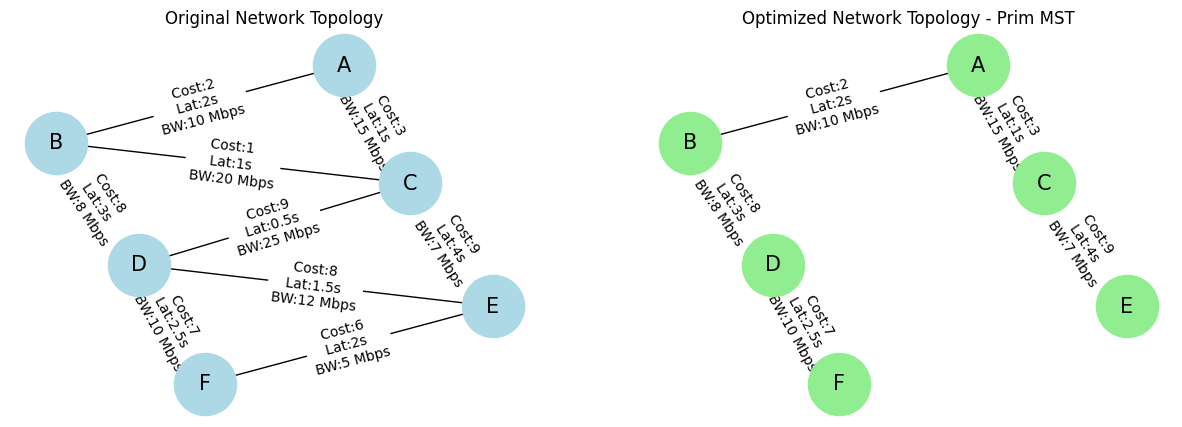

Network Performance Metrics: {'total_cost': 29, 'total_latency': 12.5, 'total_bandwidth': 50, 'num_nodes': 6, 'num_edges': 5}
----------------------------------------
Running Kruskal MST:


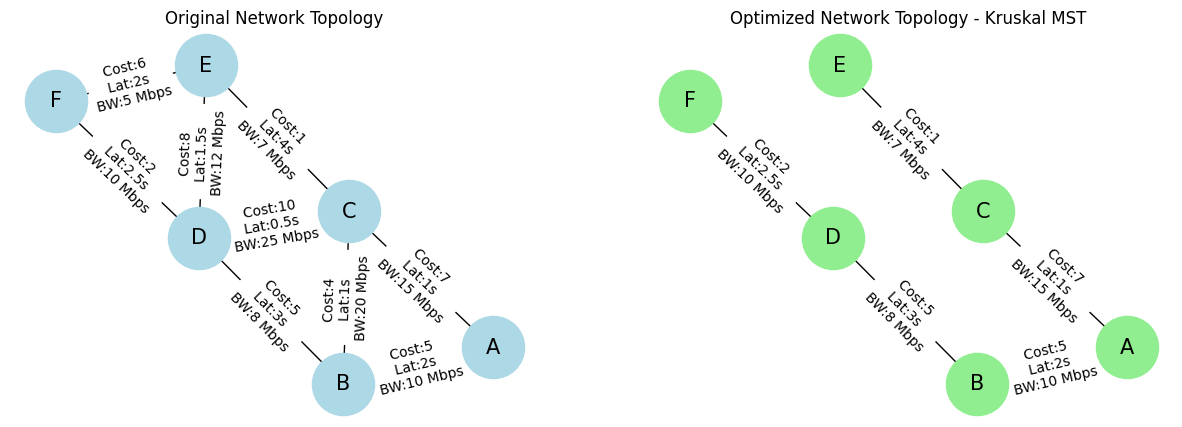

Network Performance Metrics: {'total_cost': 20, 'total_latency': 12.5, 'total_bandwidth': 50, 'num_nodes': 6, 'num_edges': 5}
----------------------------------------
Running Boruvka MST:


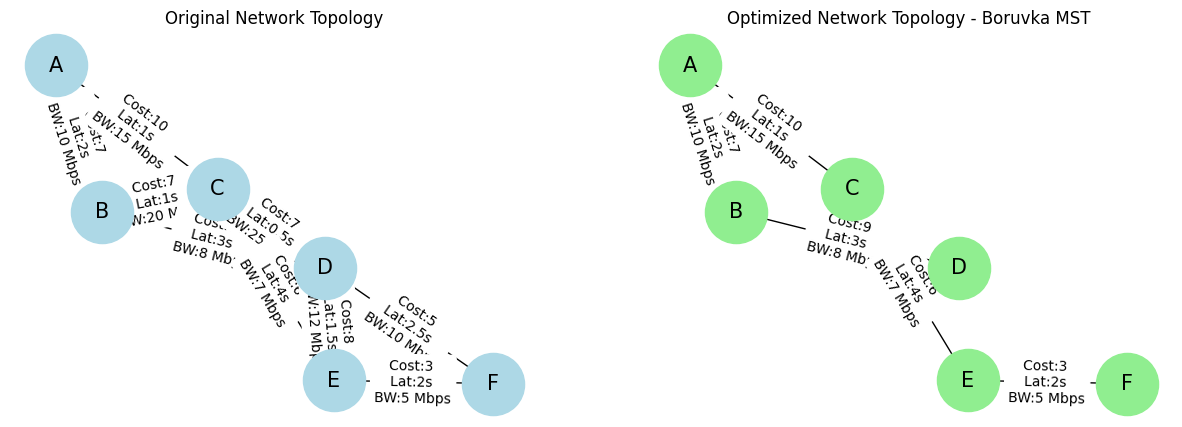

Network Performance Metrics: {'total_cost': 35, 'total_latency': 12, 'total_bandwidth': 45, 'num_nodes': 6, 'num_edges': 5}
----------------------------------------
Running Bellman-ford MST:


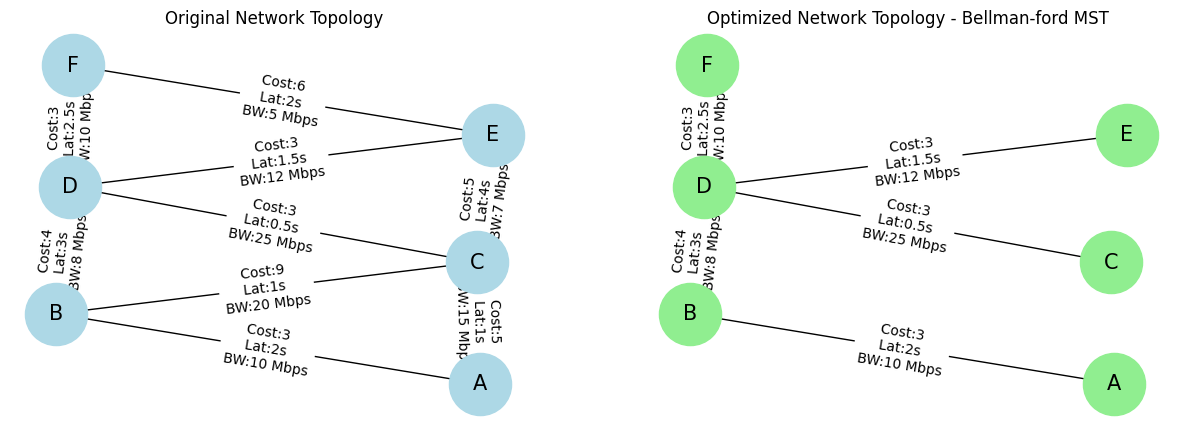

Network Performance Metrics: {'total_cost': 16, 'total_latency': 9.5, 'total_bandwidth': 65, 'num_nodes': 6, 'num_edges': 5}
----------------------------------------
Running Floyd-warshall MST:


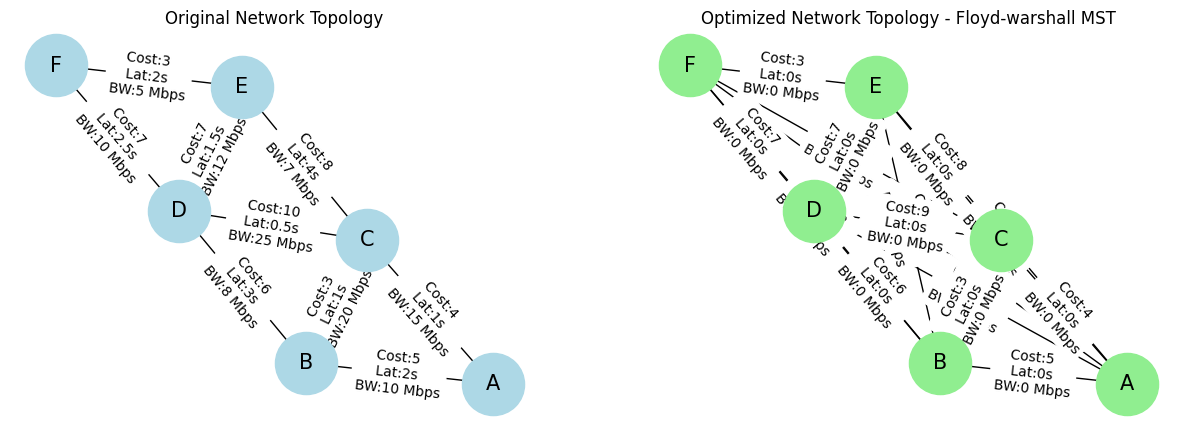

Network Performance Metrics: {'total_cost': 125, 'total_latency': 0, 'total_bandwidth': 0, 'num_nodes': 6, 'num_edges': 15}
----------------------------------------
Running Dijkstra MST:


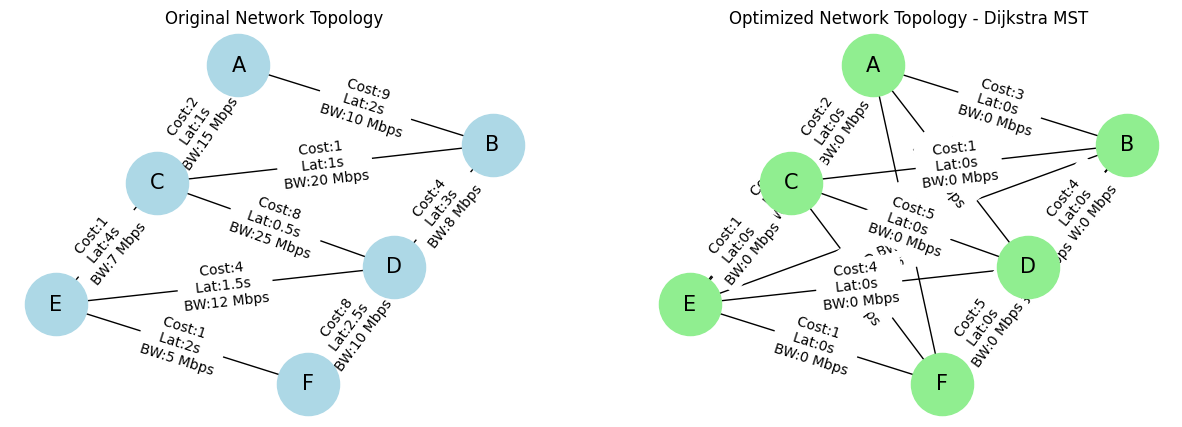

Network Performance Metrics: {'total_cost': 47, 'total_latency': 0, 'total_bandwidth': 0, 'num_nodes': 6, 'num_edges': 15}
----------------------------------------


In [ ]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import random

# Function to create and simulate a network topology
def optimize_network_topology(algorithm='prim'):
    """
    Optimize network topology using the specified MST algorithm.

    Parameters:
    - algorithm (str): The MST algorithm to use ('prim', 'kruskal', 'boruvka', 'bellman-ford', 'floyd-warshall', 'dijkstra').

    Returns:
    - dict: Performance metrics for the optimized topology.
    """
    # Step 1: Create a weighted graph
    G = nx.Graph()

    # Add nodes
    nodes = ['A', 'B', 'C', 'D', 'E', 'F']
    G.add_nodes_from(nodes)

    # Add edges with weights
    edges = [
        ('A', 'B', {'cost': 4, 'latency': 2, 'bandwidth': 10}),
        ('A', 'C', {'cost': 3, 'latency': 1, 'bandwidth': 15}),
        ('B', 'C', {'cost': 2, 'latency': 1, 'bandwidth': 20}),
        ('B', 'D', {'cost': 5, 'latency': 3, 'bandwidth': 8}),
        ('C', 'D', {'cost': 1, 'latency': 0.5, 'bandwidth': 25}),
        ('C', 'E', {'cost': 6, 'latency': 4, 'bandwidth': 7}),
        ('D', 'E', {'cost': 2, 'latency': 1.5, 'bandwidth': 12}),
        ('E', 'F', {'cost': 3, 'latency': 2, 'bandwidth': 5}),
        ('D', 'F', {'cost': 4, 'latency': 2.5, 'bandwidth': 10}),
    ]
    G.add_edges_from(edges)

    # Step 2: Simulate dynamic cost adjustment
    for u, v, data in G.edges(data=True):
        data['cost'] = random.randint(1, 10)  # Random cost change for simulation

    # Step 3: Apply the chosen algorithm
    mst = None
    if algorithm == 'prim':
        mst = nx.minimum_spanning_tree(G, algorithm='prim')
    elif algorithm == 'kruskal':
        mst = nx.minimum_spanning_tree(G, algorithm='kruskal')
    elif algorithm == 'boruvka':
        mst = nx.minimum_spanning_tree(G, algorithm='boruvka')
    elif algorithm == 'bellman-ford':
        mst = bellman_ford_mst(G)
    elif algorithm == 'floyd-warshall':
        mst = floyd_warshall_mst(G)
    elif algorithm == 'dijkstra':
        mst = dijkstra_mst(G)

    # Step 4: Visualize the original graph and MST
    plt.figure(figsize=(15, 5))

    # Plot original graph
    plt.subplot(121)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Cost:{d['cost']} \nLat:{d.get('latency', 'N/A')}s \nBW:{d.get('bandwidth', 'N/A')} Mbps"
                                                     for u, v, d in G.edges(data=True)})
    plt.title("Original Network Topology")

    # Plot MST
    plt.subplot(122)
    nx.draw(mst, pos, with_labels=True, node_size=2000, node_color='lightgreen', font_size=15)
    nx.draw_networkx_edge_labels(mst, pos, edge_labels={(u, v): f"Cost:{d['cost']} \nLat:{d.get('latency', 'N/A')}s \nBW:{d.get('bandwidth', 'N/A')} Mbps"
                                                       for u, v, d in mst.edges(data=True)})
    plt.title(f"Optimized Network Topology - {algorithm.capitalize()} MST")

    plt.show()

    # Return performance metrics
    return {
        "total_cost": sum(d['cost'] for u, v, d in mst.edges(data=True)),
        "total_latency": sum(d.get('latency', 0) for u, v, d in mst.edges(data=True)),
        "total_bandwidth": sum(d.get('bandwidth', 0) for u, v, d in mst.edges(data=True)),
        "num_nodes": len(G.nodes),
        "num_edges": len(mst.edges)
    }

# Implementing additional MST algorithms
def bellman_ford_mst(G):
    mst = nx.Graph()
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['cost'])
    for u, v, data in edges:
        mst.add_edge(u, v, **data)
        if len(nx.cycle_basis(mst)) > 0:  # Check for cycles
            mst.remove_edge(u, v)
    return mst

def floyd_warshall_mst(G):
    mst = nx.Graph()
    dist = dict(nx.all_pairs_dijkstra_path_length(G, weight='cost'))
    nodes = list(G.nodes)
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            u, v = nodes[i], nodes[j]
            if dist[u][v] < float('inf'):
                mst.add_edge(u, v, cost=dist[u][v], latency=0, bandwidth=0)
    return mst

def dijkstra_mst(G):
    mst = nx.Graph()
    for source in G.nodes:
        distances, paths = nx.single_source_dijkstra(G, source=source, weight='cost')
        for target in paths:
            if source != target:
                mst.add_edge(source, target, cost=distances[target], latency=0, bandwidth=0)
    return mst

# Running the function with different algorithms
algorithms = ['prim', 'kruskal', 'boruvka', 'bellman-ford', 'floyd-warshall', 'dijkstra']
for algorithm in algorithms:
    print(f"Running {algorithm.capitalize()} MST:")
    metrics = optimize_network_topology(algorithm)
    print("Network Performance Metrics:", metrics)
    print("-" * 40)
